## **Chapter 3: ANN**
### **Ex3: Predict Hourly Wage**
Cho dữ liệu Income_training.csv, hãy xây dựng mô hình dự đoán compositeHourlyWages từ
những thuộc tính còn lại.

https://www.kaggle.com/c/predict-hourly-wage/data (https://www.kaggle.com/c/predict-hourly-
wage/data)

- ID - employees id
- compositeHourlyWages - Weighted average of employee's hourly wage.
- age - the age of the employee
- yearsEducation - Number of years educated
- sex1M0F - Sex (1 for Male, 0 for Female)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [4]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [7]:
df = pd.read_csv("data/all/Income_training.csv")
df.head()

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,21.38,58,10,1
1,25.15,42,16,1
2,8.57,31,12,0
3,12.07,43,13,0
4,10.97,46,12,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   compositeHourlyWages  3197 non-null   float64
 1   age                   3197 non-null   int64  
 2   yearsEducation        3197 non-null   int64  
 3   sex1M0F               3197 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.0 KB


In [9]:
#create a dataframe with all training data except the target column
train_X = df.drop(columns=['compositeHourlyWages'])
#check that the target variable has been removed
train_X.head()

,age,yearsEducation,sex1M0F
0,58,10,1
1,42,16,1
2,31,12,0
3,43,13,0
4,46,12,0


In [10]:
#create a dataframe with only the target column
train_y = df[['compositeHourlyWages']]
#view dataframe
train_y.head()

,compositeHourlyWages
0,21.38
1,25.15
2,8.57
3,12.07
4,10.97


In [11]:
#get number of columns in training data
n_cols = train_X.shape[1]
print(n_cols)

3


In [12]:
#create model
model = Sequential()
#add model layers
model.add(Dense(16, activation='relu', input_shape=(n_cols,))) # (3+1)^2
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu')) # cải tiến bằng cách thử cho học sâu hơn,
model.add(Dense(1))

As you increase the number of nodes and layers in a model, the model capacity increases.
Increasing model capacity can lead to a more accurate model, up to a certain point, at which
the model will stop improving. Generally, the more training data you provide, the larger the
model should be. We are only using a tiny amount of data, so our model is pretty small. The
larger the model, the more computational capacity it requires and it will take longer to train.

- https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

In [13]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve any
early_stopping_monitor = EarlyStopping(patience=10)

#train model
history = model.fit(train_X, train_y,
                    epochs=300,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping_monitor],
                    verbose = False
)

dict_keys(['loss', 'val_loss'])


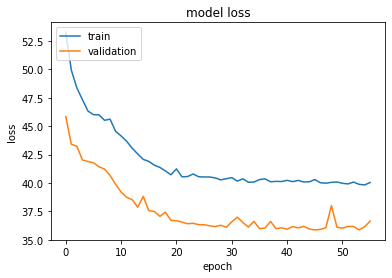

In [15]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
# evaluate the model
scores = model.evaluate(train_X, train_y)
print(scores)

100/100 [==============================] - 0s 2ms/step - loss: 39.4732
39.47321319580078


In [18]:
# Making predict on new data
df_test = pd.read_csv("data/all/Income_testing.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              800 non-null    int64
 1   age             800 non-null    int64
 2   yearsEducation  800 non-null    int64
 3   sex1M0F         800 non-null    int64
dtypes: int64(4)
memory usage: 25.1 KB


In [19]:
df_test.head()

,ID,age,yearsEducation,sex1M0F
0,1,36,20,0
1,2,38,17,0
2,3,24,10,0
3,4,39,12,1
4,5,50,12,0


In [20]:
test_X = df_test.drop(columns=["ID"])
test_y_predictions = model.predict(test_X)
test_y_predictions[:10]

array([[18.277695],
       [19.071976],
       [10.235403],
       [18.365686],
       [13.873034],
       [17.843985],
       [16.790287],
       [16.934183],
       [13.02684 ],
       [13.172269]], dtype=float32)